# Initial NLP

In [21]:
import src.nlp as nlp
import src.create_nmf as c_nmf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from pprint import pprint

import pickle

Let's load the our two datasets.

In [5]:
beer_sample, reviews_sample = c_nmf.load_data('data/beers.csv', 'data/reviews.csv', 50)

In [6]:
print(beer_sample.info())
print(reviews_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
abv                    49 non-null float64
beer                   50 non-null object
beer_url               50 non-null object
brewery                50 non-null object
brewery_profile_url    50 non-null object
gots                   50 non-null float64
note                   50 non-null object
pdev                   50 non-null float64
rank                   49 non-null float64
rating                 50 non-null float64
ratings_count          50 non-null float64
review_count           50 non-null float64
style                  50 non-null object
trade                  50 non-null float64
wants                  50 non-null float64
review_id              50 non-null object
dtypes: float64(9), object(7)
memory usage: 6.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 11 columns):
author        3384 non-null object
beer          338

Since our datasets are so large, it's going to be a bit tedious to work with all the data at once for this initial pass. So, let's sample 1000 beers. We'll use all of the reviews associated with these beers.

As you can see, we have two beers with the same name. Fortunately, they are differentiated by brewery.

Let's generate the review_id's associated with our beer sample. We can use these id's to get to the correct reviews.

Let's reindex both of our sample dataframes. This will be useful later when we need to interpet the results of SVD and NMF. We'll keep the current index as a column. This might be useful if we need to reference the index of the full dataframe for some reason.

## Document Cleaning

In [26]:
documents = reviews_sample['text'].values
documents = nlp.clean_documents(documents)

Let's go ahead and remove the punctation and stopwords from our documents.

In [27]:
documents[0]

'12 ount bottl pour pint glass pour dark brown col almost 2 fing head nic lac hop malt pres accentu coff bit chocol aroma chocol malt flav first follow mild hop hid alcohol wel med body smoo light mod carbon extrem wel bal perfect styl ip fan gre opt wint month definit buy'

And, now we can stem these words.

And now let's feed these documents into our tf-idf vectorizer.

In [50]:
tf_idf_vec = TfidfVectorizer(max_df=.95, max_features=5000)

In [51]:
doc_term = tf_idf_vec.fit_transform(documents)

In [52]:
tf_idf_vec.get_feature_names()

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '1001',
 '100th',
 '10oz',
 '11',
 '12',
 '12er',
 '12oz',
 '13',
 '14',
 '1417',
 '15',
 '15th',
 '16',
 '16oz',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '19th',
 '1cm',
 '1l',
 '1pt',
 '1st',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '20oz',
 '21',
 '22',
 '22oz',
 '23',
 '24',
 '25',
 '250',
 '250ml',
 '25cl',
 '25oz',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '2oz',
 '30',
 '300',
 '31',
 '312',
 '32',
 '33',
 '330',
 '330ml',
 '33cl',
 '35',
 '355',
 '355ml',
 '36',
 '375ml',
 '39',
 '3f',
 '3rd',
 '40',
 '42',
 '45',
 '47',
 '473',
 '473ml',
 '48',
 '48oz',
 '49',
 '4oz',
 '4pk',
 '4th',
 '50',
 '500',
 '500ml',
 '50cl',
 '55',
 '58',
 '59',
 '5l',
 '5oz',
 '5th',
 '60',
 '65',
 '650',
 '650ml',
 '66',
 '666',
 '672',
 '6er',
 '6oz',
 '6pa

In [53]:
doc_term.shape

(13005, 5000)

## SVD

With our tf-idf matrix in place, we can now perform SVD on our data. We can then use this data to make an informed decision regarding the number of features to extract.

In [54]:
svd = TruncatedSVD(n_components=100, n_iter=20)

In [55]:
results = svd.fit_transform(doc_term)

In [56]:
results.shape

(13005, 100)

In [57]:
svd.explained_variance_ratio_

array([0.00569154, 0.01407594, 0.0096309 , 0.00774486, 0.00712691,
       0.00666317, 0.00445754, 0.00438222, 0.00428199, 0.00420265,
       0.00370811, 0.00361221, 0.00356086, 0.00349774, 0.00335461,
       0.00318703, 0.00311776, 0.00306773, 0.00302306, 0.00293206,
       0.00286153, 0.00283354, 0.00280256, 0.00273439, 0.00269426,
       0.00261186, 0.00258421, 0.00257985, 0.00249174, 0.00247249,
       0.00242551, 0.00240958, 0.00240092, 0.00237609, 0.00236392,
       0.00231338, 0.00230328, 0.00226427, 0.00224344, 0.00221709,
       0.00219981, 0.00217283, 0.00213792, 0.00212997, 0.00211038,
       0.00209961, 0.00208624, 0.00205907, 0.00204039, 0.00201224,
       0.00200102, 0.00199501, 0.00198275, 0.00195008, 0.00194109,
       0.00191621, 0.00190291, 0.00188334, 0.00186912, 0.00186254,
       0.00185894, 0.00184646, 0.00183366, 0.00182452, 0.00182152,
       0.00181197, 0.00178727, 0.00177409, 0.001763  , 0.00174802,
       0.00173655, 0.00172149, 0.00170563, 0.00169623, 0.00168

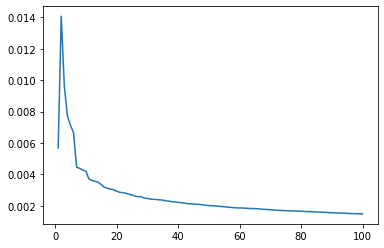

In [58]:
ax = plt.subplot()
ax.plot(range(1, len(svd.explained_variance_ratio_)+1), svd.explained_variance_ratio_)

In [59]:
svd.explained_variance_

array([0.00530605, 0.01312257, 0.0089786 , 0.00722029, 0.0066442 ,
       0.00621187, 0.00415563, 0.00408541, 0.00399197, 0.003918  ,
       0.00345696, 0.00336755, 0.00331968, 0.00326083, 0.0031274 ,
       0.00297117, 0.00290659, 0.00285995, 0.00281831, 0.00273347,
       0.00266771, 0.00264163, 0.00261274, 0.00254919, 0.00251177,
       0.00243496, 0.00240918, 0.00240511, 0.00232297, 0.00230503,
       0.00226123, 0.00224638, 0.00223831, 0.00221515, 0.00220381,
       0.0021567 , 0.00214728, 0.00211091, 0.00209149, 0.00206693,
       0.00205082, 0.00202566, 0.00199312, 0.00198571, 0.00196744,
       0.0019574 , 0.00194494, 0.00191961, 0.00190219, 0.00187595,
       0.00186549, 0.00185989, 0.00184846, 0.001818  , 0.00180961,
       0.00178642, 0.00177402, 0.00175578, 0.00174252, 0.00173639,
       0.00173303, 0.0017214 , 0.00170947, 0.00170095, 0.00169814,
       0.00168924, 0.00166622, 0.00165393, 0.00164359, 0.00162963,
       0.00161893, 0.0016049 , 0.00159011, 0.00158134, 0.00157

In [60]:
svd.components_.shape

(100, 5000)

In [78]:
nmf = NMF(n_components=6)

In [79]:
nmf_results = nmf.fit_transform(doc_term)

In [80]:
nmf_results.shape

(13005, 6)

In [81]:
nmf.components_.shape

(6, 5000)

In [65]:
svd_results = np.linalg.svd(doc_term.toarray(()))

In [66]:
doc_term.shape

(13005, 5000)

In [67]:
type(svd_results)

tuple

In [68]:
len(svd_results)

3

In [69]:
U, S, Vh = svd_results

In [70]:
type(U)

numpy.ndarray

In [72]:
S.shape

(5000,)

In [74]:
S[0:10]

array([30.75929202, 13.06544872, 10.80805438,  9.70638986,  9.31887961,
        8.99672373,  7.35648604,  7.28909409,  7.20812831,  7.14014363])

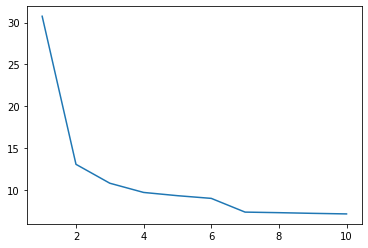

In [77]:
ax = plt.subplot()
ax.plot(range(1, len(S[0:10])+1), S[0:10])

In [85]:
import src.create_nmf as c_nmf

In [104]:
tp = c_nmf.load_data('data/beers.csv', 'data/reviews.csv')

In [102]:
tp[1].shape

(790216, 11)

In [103]:
tp[0].shape

(9248, 16)

In [106]:
tp[0].head()

,abv,beer,beer_url,brewery,brewery_profile_url,gots,note,pdev,rank,rating,ratings_count,review_count,style,trade,wants,review_id
0,8.6,lagunitas imperial pils,https://www.beeradvocate.com/beer/profile/220/...,lagunitas brewing company,/beer/profile/220/,85.0,None provided.,9.16,13465.0,3.93,343.0,104.0,american imperial pilsner,0.0,13.0,lagunitas brewing company lagunitas imperial pils
1,7.5,1901 red ale,https://www.beeradvocate.com/beer/profile/1728...,bold city brewery,/beer/profile/17284/,8.0,None provided.,12.05,16493.0,3.90,74.0,22.0,american amber / red ale,0.0,1.0,bold city brewery 1901 red ale
2,4.5,conundrum,https://www.beeradvocate.com/beer/profile/2097...,kuhnhenn brewing company,/beer/profile/2097/,1.0,"Deep amber in color, this English session bier...",10.82,25095.0,3.79,21.0,6.0,english dark mild ale,0.0,0.0,kuhnhenn brewing company conundrum
3,0.5,busch na,https://www.beeradvocate.com/beer/profile/29/1...,anheuser-busch,/beer/profile/29/,8.0,"Fully brewed with finest natural ingredients, ...",37.44,47674.0,2.19,99.0,53.0,low alcohol beer,0.0,2.0,anheuser-busch busch na
4,4.9,churchville lager,https://www.beeradvocate.com/beer/profile/2902...,neshaminy creek brewing company,/beer/profile/29021/,47.0,Pennsylvania breweries are known for world-cla...,10.24,30839.0,3.71,173.0,36.0,vienna lager,0.0,7.0,neshaminy creek brewing company churchville lager


In [23]:
with open('pickles/NMF.pkl', 'rb') as p:
    nmf_pkl = pickle.load(p)

In [24]:
nmf_pkl

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=15, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [25]:
nmf_pkl.components_

array([[1.75316557e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.22598079e-06,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.96374663e-01, 0.00000000e+00, 0.00000000e+00,
        9.81717785e-07, 0.00000000e+00, 3.07007636e-01, 0.00000000e+00,
        5.05617641e-07, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.79785647e-01, 0.00000000e+00, 0.00000000e+00,
        1.07942550e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.01285371e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.32224565e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.68585983e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.38992360e-01,
   